In [7]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import yfinance as yf  # You can use yfinance to fetch historical stock data
import itertools

data = pd.DataFrame().ta.ticker("TSLA")

# Function to calculate Sharpe ratio
def sharpe_ratio(returns, risk_free_rate=0):
    mean_return = np.mean(returns)
    std_return = np.std(returns)
    return (mean_return - risk_free_rate) / std_return

# Function to simulate trend-following strategy
def trend_following_strategy(data, fast_ma, slow_ma, stop_loss, take_profit):
    data['Fast_MA'] = data['Close'].rolling(window=fast_ma).mean()
    data['Slow_MA'] = data['Close'].rolling(window=slow_ma).mean()

    # Generate signals
    data['Signal'] = np.where(data['Fast_MA'] > data['Slow_MA'], 1, 0)
    data['Signal'] = np.where(data['Fast_MA'] < data['Slow_MA'], -1, data['Signal'])

    # Calculate returns
    data['Returns'] = data['Close'].pct_change().shift(-1) * data['Signal']

    # Apply stop loss and take profit
    data['Returns'] = np.where(data['Signal'] == 1, np.minimum(data['Returns'], take_profit), data['Returns'])
    data['Returns'] = np.where(data['Signal'] == -1, np.maximum(data['Returns'], -stop_loss), data['Returns'])

    return data

# Fetch historical data
ticker = 'AAPL'  # Example ticker symbol (Apple Inc.)
start_date = '2020-01-01'
end_date = '2021-01-01'
data = yf.download(ticker, start=start_date, end=end_date)

# Define parameter ranges
fast_ma_range = range(10, 21, 5)  # Fast moving average range
slow_ma_range = range(30, 61, 10)  # Slow moving average range
stop_loss_range = [0.01, 0.02, 0.03]  # Stop loss range (as a percentage)
take_profit_range = [0.01, 0.02, 0.03]  # Take profit range (as a percentage)

# Initialize variables to store optimal parameters and Sharpe ratio
best_params = {}
best_sharpe = float('-inf')

# Iterate over parameter combinations
for params in itertools.product(fast_ma_range, slow_ma_range, stop_loss_range, take_profit_range):
    fast_ma, slow_ma, stop_loss, take_profit = params
    data = trend_following_strategy(data.copy(), fast_ma, slow_ma, stop_loss, take_profit)
    sharpe = sharpe_ratio(data['Returns'])
    
    # Update best parameters if Sharpe ratio is improved
    if sharpe > best_sharpe:
        best_sharpe = sharpe
        best_params = {'Fast_MA': fast_ma, 'Slow_MA': slow_ma, 'Stop_Loss': stop_loss, 'Take_Profit': take_profit}

print("Optimal Parameters:")
print(best_params)
print("Sharpe Ratio:", best_sharpe)

c:\Users\Arnas Vaicekauskas\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\Arnas Vaicekauskas\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


Optimal Parameters:
{'Fast_MA': 20, 'Slow_MA': 40, 'Stop_Loss': 0.01, 'Take_Profit': 0.03}
Sharpe Ratio: 0.22345313750790288


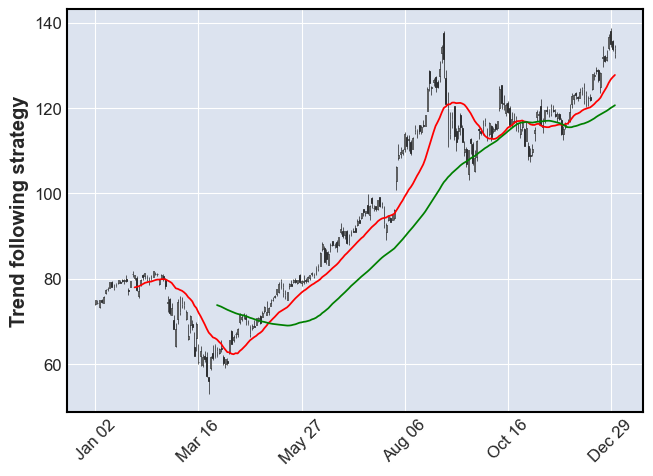

In [8]:
import mplfinance as mpf
marker_offset = 10

apds = [
    mpf.make_addplot(data['Fast_MA'], color='r'),
    mpf.make_addplot(data['Slow_MA'], color='g'),
    #mpf.make_addplot(data['stop_loss'], color='r', linestyle='-.'),
    #mpf.make_addplot(df['take_profit'], color='g', linestyle='-.'),
    #mpf.make_addplot(df['buy_action'] - marker_offset, type='scatter', panel=0, secondary_y=False, markersize=100, marker='^', color = 'green', width=1),
    #mpf.make_addplot(df['sell_action'] + marker_offset, type='scatter', panel=0, secondary_y=False, markersize=100, marker='v', color = 'red', width=1),
    #mpf.make_addplot(df['dsignal'], type='scatter', panel=1, color='r', secondary_y=False),
    #mpf.make_addplot(df['sma-short'], panel=0, color='r', secondary_y=False, ylabel='long', width=1),
    #mpf.make_addplot(df['sma-long'], panel=0, color='g', secondary_y=False, ylabel='short', width=1),
    #mpf.make_addplot(df['signal'], panel=1, color='b', secondary_y=False, width=1),
    #mpf.make_addplot(df['profit'], panel=2, color='b', secondary_y=False, width=1),
    #mpf.make_addplot(df['real_profit'], panel=2, color='r', secondary_y=False, width=1),
]

mpf.plot(data, type='candle', addplot=apds, volume=False, ylabel='Trend following strategy')